# Getting Started

## This is a python environment

To run a command, click in the cell and click the play button above or press Ctrl+enter (or shift+enter which automatically places your cursor in the next cell down, or alt+enter to also add a new cell below)

In [1]:
print("Hello, Fellows!")

Hello, Fellows!


In [3]:
# shorthand for print 1+2 , can only be used once per cell to avoid ambiguity
1 + 2 

3

In [2]:
# a semi-colon supresses the cell output
1 + 2;

#### Notebooks have two different keyboard input modes:
1. <b>Edit mode</b> allows you to type code/text into a cell and is indicated by a green cell border. 
2. <b>Command mode</b> binds the keyboard to notebook level actions and is indicated by a grey cell border.
<br>

Change from edit to command mode by pressing `esc`. And change back by hitting `enter` 

#### Change, add and delete cells in command mode
- Change cell type from code to markdown by pressing `m`. Change it back to code with `y`. 
- Add a cell above with `a` and below with `b`
- Delete a cell with `dd`

Type `h` for more keyboard shortcuts

# Data Science in Python == Data Science in Numpy

The fundamental library for data science is numpy. __Numpy__ gives us *fast* and *powerful* tools for numerical operations on large, multi-dimensional arrays of data. Which as you can image is useful for much of data science!

Then, a kind soul called Wes McKinney decided to make our lives even easier. He created __pandas__, a library built on top of numpy which makes analysing messy, real-world datasets more intuitive. Pandas adds more functionality and a wonderfully useful 2-dimensional data structure known as a `DataFrame`.

Knowing how to use these libraries will make the slog of understanding your data and getting it into a useable state much easier. If you also understand _why_ these libraries matter, your code will be faster, more reuseable and better suited to being deployed into production. 

In [4]:
# You will always see these libraries imported in the following way

import numpy as np
import pandas as pd 

## Check if numpy has a function that does it for you

If you don't read any further, that's the key lesson. Here's how you can do it:

Think np has a sum method? Let's check!

```ipython
In [2]: np.su*?
```

In [5]:
np.su*?

To display all the contents of the numpy namespace

```ipython
In [3]: np.<TAB>
```

In [ ]:
# try it for yourself

To display Numpy's built-in documentation:

```ipython
In [4]: np?
```

In [6]:
# try it for yourself
np?

In general, make extensive use of documentation & StackOverflow. Numpy and Pandas have so many users that any question you have has likely been asked and answered on Stack Overflow. Other useful resources:

- [Pandas online documentation](http://pandas.pydata.org/)
- [Numpy online documentation](https://docs.scipy.org/doc/)
- [* Python Data Science Handbook*](http://shop.oreilly.com/product/0636920023784.do) Written by Jake VanderPlas.  
- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) Written by Wes McKinney (the original creator of Pandas)

## Why do we care about numpy?

1. Our code is faster
3. Our code is (often) more readable
2. Our code is (almost always) more intuitive

#### For example:  Implementing a simple  [random walk](https://en.wikipedia.org/wiki/Random_walk)

i.e. at each step, move either one place forward or one place backward

In [7]:
# python implementation - requires for loop
import random

def random_walk(n):
    '''Randomly walk n steps'''
    position = 0
    walk = [position]
    for i in range(n):
        position += random.choice([-1, 1])
        walk.append(position)
    return walk

%timeit random_walk(1000) # timeit is a "magic" ipython command - see the documentation for others

1000 loops, best of 3: 1.39 ms per loop


In [8]:
# numpy implementation - no for loop, ~100x faster, more readable
def random_walk(n):
    '''Randomly walk n steps'''
    steps = np.random.choice([-1, 1], size=n) 
    return np.cumsum(steps)

%timeit random_walk(1000)

The slowest run took 16.35 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 31.7 µs per loop


The idea of removing `for` loops in favour of creating and manipulating whole arrays at a time is central to numerical computing in python, and most of what follows focuses on it. This is known as a *vectorized* operation. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

You can make use of this by using numpy arrays rather than python lists, and using:
1. <b><a href=http://docs.scipy.org/doc/numpy/reference/ufuncs.html>Ufuncs</a></b> for element-wise operations on arrays (+, -, *, /, etc.)
2. <b>Aggregations</b> for summarizing the values of an array (e.g. np.min, np.max, np.sum, np.mean)
3. <b><a href=http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc>Broadcasting</a></b> for combining arrays
4. <b><a href=http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html>Indexing and slicing</a></b> 

We will see examples of all of these in the remainder of the notebook. 

## What makes numpy fast?

You might wonder how it's possible for an extension to a language, like the numpy extension of python, can make computations faster - how, for example, it can move to an array-first approach. If you're not wondering that - move right on to the actual coding!

Python is very easy to use and quick to code in. One reason for this is dynamic typing. While a statically-typed language like C requires each variable to be explicitly declared, a dynamically-typed language like Python skips this specification. Instead, in Python the types are dynamically inferred. 

Because of Python's dynamic typing, we can create heterogeneous lists:

In [9]:
l = [True, "2", 3.0, 4]
[type(item) for item in l] # this is a python "list comprehension", basically a more compact syntax for a for-loop

[bool, str, float, int]

But this flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array.

Unlike a Python list, a numpy array is stored in a *contiguous block of memory*. This [locality in memory](https://en.wikipedia.org/wiki/Locality_of_reference)
allows for __faster accessing and for specialised implementations__ of method, many of which are actually executed in C, not python.

In fact, items are (often) stored as C arrays, which are statically typed. Items in a numpy array are *the same data type*, meaning we (often) __avoid the cost of per-element dynamic type checking__.

The items in an array can be accessed using an *indexing scheme*. The indexing scheme is by shape and data type -- exactly what is needed in defining a new array.

ndarray = block of memory (raw data) + indexing scheme (how to locate an element) + data type descriptor (how to interpret an element)

_(The complete story involves a few more complications)_

## The majority of this notebook provides challenges for you. 

They come in two parts:
1. A series of examples and coding challenges to build your skills in numpy
2. A series of problems that require you to [vectorise](https://en.wikipedia.org/wiki/Array_programming) : re-implement functions to apply operations to entire subsets of your data, rather than item by item.



You can also ctrl+f for 'Task' to find all the programming challenges.

# 1. Hello Numpy World 
Let's see what I'm on about. 

We'll cover:
    
    i. Creating data arrays
    ii. Indexing 
    iii. Reshaping arrays
    iv. Broadcasting scalars and arrays to different sizes
    v. Matrix operations


## i. Creating data

In [10]:
np.array([1, 0, 0, 1, 0]) # note: argument is a list [...]

array([1, 0, 0, 1, 0])

In [11]:
np.zeros(5) # create a 5-element array of zeros

array([ 0.,  0.,  0.,  0.,  0.])

In [12]:
np.ones((3, 5), dtype=int) # create a 3x5 array of integer ones (default is to create floats)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [13]:
np.linspace(0, 1, num=5) # create an evenly spaced array of length 5 between 0 and 1 

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

#### Task: create some data on a log scale

In [15]:
## your code here
np.log(np.linspace(2,4,num=6))


array([ 0.69314718,  0.87546874,  1.02961942,  1.16315081,  1.28093385,
        1.38629436])

In [18]:
r = np.random.randint(0, 6, size=(4, 3))
r

array([[2, 1, 2],
       [3, 4, 3],
       [5, 4, 5],
       [4, 3, 1]])

In [21]:
np.zeros_like(r)



array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

Random data:

In [23]:
# Gaussian
np.random.randn(4) 


array([ 0.73202007, -2.16687868,  0.57131125,  1.50828711])

#### Task: Try setting the seed before creating an array with random values. (Generate data from a different distribution. Try to figure out what `np.random.seed` does.)

In [99]:
np.random.seed(1)  
## your code here
a = np.random.randn(5)
b = np.random.randn(5)
print(a)
print(b)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[-2.3015387   1.74481176 -0.7612069   0.3190391  -0.24937038]


## ii. Access data by indexing

In [68]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [69]:
a[2, 2] # item by index

8

Note: Python uses zero-baed indexing

In [70]:
a[1] # row by index

array([3, 4, 5])

In [71]:
a[:, 2] # column by index

array([2, 5, 8])

In [72]:
a[1:, :2] # what is this doing?

array([[3, 4],
       [6, 7]])

#### Task: Using a single index, of the form `a[:,:]`, access the 4 corner values of our matrix `a` 

In [81]:
## your code here
a[0:3:2,0:3:2]

array([[0, 2],
       [6, 8]])

#### Task:  Select the even numbers from the (5, 5) array defined below

In [83]:
a = np.arange(25).reshape(5, 5)
## your code here
a[a%2==1]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

#### Task: return the 2nd, 3rd and 5th item in every other row in `P`, starting with row 0
Hint: look at np.ix_

In [112]:
P = np.random.rand(5, 5)
## your code here
#print(P)
P[:,[1,2,4]]
P[np.ix_([0,1,2,3,4],[1,2,4])]


array([[ 0.53589641,  0.66379465,  0.94459476],
       [ 0.90340192,  0.1374747 ,  0.80739129],
       [ 0.1653542 ,  0.92750858,  0.7508121 ],
       [ 0.88330609,  0.62367221,  0.34889834],
       [ 0.89588622,  0.42809119,  0.6634415 ]])

#### Task: Generate a 10 x 3 array of random numbers in range [0,1]. For each row, pick the number closest to 0.5.

In [180]:
## your code
R = np.random.rand(10,3)
print(R)
ind = np.argmin(np.abs(R-np.ones_like(R)*0.5),1).reshape(10,1)
row = np.array([0 for i in range(10)]).reshape(10,1)
#row = row.reshape(10,1)
#ind = ind.reshape(10,1)
R[row,ind]

[[ 0.04157423  0.98970695  0.46488763]
 [ 0.73458501  0.64080762  0.7230934 ]
 [ 0.0511109   0.92004541  0.92684122]
 [ 0.55199503  0.96391589  0.28095554]
 [ 0.60214663  0.39646269  0.62802323]
 [ 0.30063229  0.81935838  0.06978598]
 [ 0.04187757  0.04939638  0.15045503]
 [ 0.39535047  0.95538999  0.11079544]
 [ 0.64755299  0.52762151  0.35324241]
 [ 0.19819923  0.22059408  0.04382151]]


array([[ 0.46488763],
       [ 0.98970695],
       [ 0.98970695],
       [ 0.04157423],
       [ 0.04157423],
       [ 0.04157423],
       [ 0.46488763],
       [ 0.04157423],
       [ 0.98970695],
       [ 0.98970695]])

In [181]:
R = np.random.rand

<function RandomState.rand>

#### Task: You're given two matrices of the same shape. Select values from the first if the values in the second are positive. 

In [183]:
first = np.random.randint(10, size=(10,10))
second = np.random.randn(100).reshape(10,10) - 0.3
## your code
first[second>0]

array([7, 5, 8, 0, 0, 5, 1, 0, 2, 3, 0, 2, 5, 4, 3, 3, 3, 3, 9, 7, 6, 4, 6,
       5, 6, 5, 4, 3, 0, 4, 3, 4, 8, 7])

## iii. Reshaping

In [184]:
z = np.zeros(6)
print(z.shape)
print(z)

(6,)
[ 0.  0.  0.  0.  0.  0.]


In [185]:
z.reshape(len(z), 1) 

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [186]:
# you will also come across this method for adding an extra dimension to an array
# which has the same effect as the line above
z[:, None]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [187]:
# or this!
z[:, np.newaxis]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [188]:
z[3] = 1
z = z.reshape(3, 2)
z

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  0.]])

In [189]:
z.itemset((2, 1), 8) # set in-place
z = z.reshape(2, -1) # unspecified (-1) dimension inferred
z

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  8.]])

In [ ]:
# transpose 
z.T

In [195]:
print(z.ravel()) # view
np.ravel?
print(z.flatten()) # copy

[ 0.  0.  0.  1.  0.  8.]
[ 0.  0.  0.  1.  0.  8.]


See the [documentation](http://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html) for a discussion of views and copies in numpy.

#### Task: Create a 3-dimensional array, then use indexing to return the first dimension

In [198]:
## your code here
p = np.random.randn(2,3,4)
print(p)
p[0,:,:]

[[[ 0.89592148 -1.10677887 -0.96266256 -1.25195743]
  [ 1.14760667 -0.51473492 -0.10138078 -0.33221068]
  [-0.96365658  0.37326097  0.38302687  0.94132558]]

 [[-0.22542008 -0.29708742 -0.58552175  1.48814157]
  [ 1.00756699 -0.04038521  0.64897361 -0.58584375]
  [ 2.05447476 -0.59156625 -0.37968896 -0.37103152]]]


array([[ 0.89592148, -1.10677887, -0.96266256, -1.25195743],
       [ 1.14760667, -0.51473492, -0.10138078, -0.33221068],
       [-0.96365658,  0.37326097,  0.38302687,  0.94132558]])

#### Task: split `arrays` into 3 arrays with shape (10, 4)

In [201]:
arrays = np.stack([np.random.randn(3, 4)
                   for _ in range(10)], axis=0)
print(arrays)
print(arrays.shape)
arrays.reshape(3,10,4)
## your code here

[[[ 0.09673935  1.069501    0.68140191  0.73401181]
  [ 1.05304238  0.62521819  0.75825943  0.40372408]
  [-0.97538855  0.5260951   0.94588637 -0.89190966]]

 [[ 0.23598998  1.08281307 -0.37347646 -1.32110657]
  [ 0.06153397  1.59368556 -0.91294542 -0.10539007]
  [-0.75103095 -0.35896729  0.23477128  1.47681361]]

 [[-0.71664403 -0.70865499 -0.87250244 -1.09379045]
  [-1.53470006 -0.8512622  -0.10581327  0.04086539]
  [ 1.17244919 -0.82160048 -0.77993812 -0.75683724]]

 [[ 0.19574592 -0.15847242  0.7772088  -0.78914081]
  [ 0.91325885  0.94251314 -0.2624677  -0.62253745]
  [ 0.18116909 -0.79153377  1.99220474  0.1408873 ]]

 [[ 0.79244077 -1.2671073  -1.75075758  0.68726621]
  [ 0.51588672 -0.76060476 -0.56677565 -0.6799438 ]
  [ 0.22782691  0.92385213 -1.54486021  0.47874513]]

 [[-0.87416772 -0.53093196 -0.16043521 -1.36145404]
  [ 2.84393857  2.42497747  0.75226986  0.65601518]
  [-1.04361019  2.37734888  0.01831726 -0.12339551]]

 [[ 1.20399358  0.26080007 -0.77660361 -0.21892143]


array([[[ 0.09673935,  1.069501  ,  0.68140191,  0.73401181],
        [ 1.05304238,  0.62521819,  0.75825943,  0.40372408],
        [-0.97538855,  0.5260951 ,  0.94588637, -0.89190966],
        [ 0.23598998,  1.08281307, -0.37347646, -1.32110657],
        [ 0.06153397,  1.59368556, -0.91294542, -0.10539007],
        [-0.75103095, -0.35896729,  0.23477128,  1.47681361],
        [-0.71664403, -0.70865499, -0.87250244, -1.09379045],
        [-1.53470006, -0.8512622 , -0.10581327,  0.04086539],
        [ 1.17244919, -0.82160048, -0.77993812, -0.75683724],
        [ 0.19574592, -0.15847242,  0.7772088 , -0.78914081]],

       [[ 0.91325885,  0.94251314, -0.2624677 , -0.62253745],
        [ 0.18116909, -0.79153377,  1.99220474,  0.1408873 ],
        [ 0.79244077, -1.2671073 , -1.75075758,  0.68726621],
        [ 0.51588672, -0.76060476, -0.56677565, -0.6799438 ],
        [ 0.22782691,  0.92385213, -1.54486021,  0.47874513],
        [-0.87416772, -0.53093196, -0.16043521, -1.36145404],
      

## iv. Broadcasting
On numpy arrays operations, like `+`, `-`, `*`,  are elementwise. It’s possible to do __operations on arrays of different sizes__ when numpy can transform them to be the same size (known as "broadcasting").

In [202]:
np.ones(5) * 2 

array([ 2.,  2.,  2.,  2.,  2.])

You could get the same result in python like `[2] * 5` but that's not quite the same operation... 
#### Task: In plain python, if you have data in a list like `[1, 1, 1, 1, 1]` how would you multiply the values by 2?

In [210]:
l =  [1, 1, 1, 1, 1]
## your pure python code here

for i in range(len(l)):
    l[i]*=2
print(l)    

[2, 2, 2, 2, 2]


#### Task: In plain python, if you have data in a list like `[2, 2, 2, 2, 2]` how would you multiply the values elementwise by a second list like `[3, 6, 12, 24, 48]`?

In [212]:
l1 =[2, 2, 2, 2, 2]
l2 = [3, 6, 12, 24, 48]
## your code here
for i in range(len(l2)):
    l1[i] *= l2[i]
print(l1)

[6, 12, 24, 48, 96]


In [213]:
Z = np.arange(9).reshape(3, 3)
Z

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [214]:
Z + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

1 was 'broadcast' into the same shape as Z, i.e. `np.ones(shape=(3,3))`

In [215]:
np.alltrue(Z + 1 == Z + np.ones((3, 3)))

True

In [216]:
# let's make the values in a row all the same by
# adding this [2, 1, 0] to the corresponding columns
this = np.arange(3)[::-1]
print(this)
print(Z)
Z + this

[2 1 0]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[2, 2, 2],
       [5, 5, 5],
       [8, 8, 8]])

#### Task: Create a (10, 9) 2-d array where values on the same row all have the same value


In [228]:
# your code here:
p = np.arange(10).reshape(10,1)
p2 = np.ones((10,9))
p2 + p

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.],
       [  4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.],
       [  5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.],
       [  6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.],
       [  7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.],
       [  8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.,   8.],
       [  9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.]])

#### Task: Make use of broadcasting to add 3 to first row, 2 to the second row and 1 to the third row of Q

In [233]:
Q = np.arange(9).reshape(3, 3)
## your single line of code here
a = np.arange(3)[::-1].reshape(3,1)+1
#print(Q)
#print(a)
Q+a

array([[3, 4, 5],
       [5, 6, 7],
       [7, 8, 9]])

Broadcasting can be hard to get your head around first. Attempting to broadcast arrays with incompatible dimensions will lead to errors, which can often be fixed by transposing one of your arrays. See the [documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) for a full explanation of which arrays can be broadcast. A more intuitive explanation is also available [here](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.05-Computation-on-arrays-broadcasting.ipynb).

# 2. Vectorising operations

As far as possible move operations outside of `for` loops. In other words, let's apply operations to entire subsets of data, rather than item by item.

#### Task: Write an `add` function in plain python that takes two lists as input and returns their elementwise sum

In [239]:
def add(first, second):
    '''Elementwise sum'''
    ## your code here
    result = np.zeros_like(first)
    for i in range(len(first)):
        result[i] = first[i] + second[i]
    return result
add([1,2,3],[3,4,5])    

array([4, 6, 8])

#### Task: Write an `add` function using numpy

In [240]:
def vectorised_add(first, second):
    '''Elementwise sum'''
    ## your code here
    return first + second

add([1,2,3],[3,4,5])    

array([4, 6, 8])

#### Task: Compute the euclidean distance between all points on a grid of evenly spaced values
- Create an array of 100 evenly spaced values
- Create a grids of all possible (x, y) values from the array (look at `np.meshgrid`)
- Compute a matrix `d` containing euclidean_distance(x, y) for each (x, y) pair

To check your answer, we provide code for plotting `d`.

In [304]:
## your code here 
a = np.arange(100).reshape(100,1)
X,Y = np.meshgrid(a,a)
#print(X)
#print(Y)
d = np.abs(X-Y)
print(d)
dist = np.sqrt(np.dot(d,d))

[[ 0  1  2 ..., 97 98 99]
 [ 1  0  1 ..., 96 97 98]
 [ 2  1  0 ..., 95 96 97]
 ..., 
 [97 96 95 ...,  0  1  2]
 [98 97 96 ...,  1  0  1]
 [99 98 97 ...,  2  1  0]]


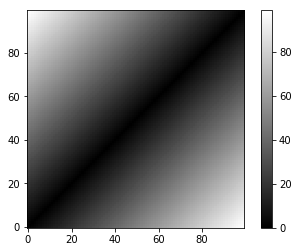

In [306]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.abs(X - Y), cmap=plt.cm.gray, origin='lower')
plt.colorbar()
plt.show()

## Vectorising functions

### Task: Applying this in machine learning 
In supervised machine learning, we use labelled data to find the parameters of a function that accurately maps the raw data to the corresponding labels. We 'learn' the parameters by quantifying how well our current model is doing and using some optimization criterion to update the parameters in a direction that improves predictions.

Therefore, a common machine learning task is minimising a function which quantifies the agreement between our model's predictions and the ground truth 
(call this function a [_loss function_](https://en.wikipedia.org/wiki/Loss_function) or _cost function_).

Of course when training a model, we want to be able to get fast feedback on how well we're doing, so it's important to calculate the loss function efficiently. Below, we give you a dataset of images belonging to 10 categories, a function that maps the raw data to class scores and a (inefficient, non-vectorised) loss function.
#### You need to speed the learning up, by implementing a vectorised version of the loss function.

- **Data** : 60,000 tiny images belonging to 10 different categories.

In [263]:
# you don't have to read this
import pickle

def unpickle(file):
    '''Unpickle data from binary'''
    with open(file, 'rb') as f:
        return pickle.load(f, encoding='bytes')

def load_cifar10_data(folder='data/cifar-10-batches-py'):
    '''Load train and test sets of CIFAR 10 data.
    
    Parameters
    ----------
    folder : string, optional (default = 'Cifar-10-data')
        Path to folder containing data.
        
    Returns
    -------
    X_train : numpy array, shape (50000, 3072)
        Matrix of flattened 32x32 pixel RGB images.
    y_train : numpy array, shape (50000,)
        Vector of corresponding labels for images.
    X_test : numpy array, shape (10000, 3072)
    y_test : numpy array, shape (10000,)
    '''
    trainingset = {}
    for i in np.arange(1,6):
        trainingset[i] = unpickle('{}/data_batch_{}'.format(folder, i))
    # 'b' prefix required for bytes literals in python 3
    X_train = np.vstack([trainingset[i][b'data'] for i in np.arange(1,6)])
    y_train = np.hstack([trainingset[i][b'labels'] for i in np.arange(1,6)])

    testset = unpickle('{}/test_batch'.format(folder))
    X_test = testset[b'data']
    # testset labels are a list. Make np.array for consistency.
    y_test = np.array(testset[b'labels'])
    
    return X_train, y_train, X_test, y_test

- **Score function** : We'll use a simple linear model $$ s = f(x, W) = Wx $$ (Ignoring the usual bias term $b$. If you wish to include it, extend $W$ to have an extra column and each image vector $x$ with a $1$ that multiplies the new bias column of $W$).
    - Specifically, $x$ is an image, so a 1-d array of 32x32x3 = 3072 pixel values
    - We want to assign $x$ a score for each of the 10 possible labels, so $s$ will be a vector of length 10, and thus $W$ will have shape (10, 3072)

In [264]:
def score(x, W): 
    return np.dot(W, x)

- **Loss function** : We'll use $ L = max(0,-) $ sometimes called the _hinge loss_.
    - Specifically the loss for a single image $x_i$ is $$ L_i = \sum_{j \neq y_i} max(0, s_j - s_{y_i} + \Delta ) $$
        - $j$ are the 10 possible classes,
        - $y_i$ is the correct class for image $x_i$, and
        - $s$ is the vector of scores assigned by the score function (so $s_j$ is the score assigned to the $j^{th}$ class)
    - i.e. the loss $L_i$ for a single image $x_i$ equals zero when the score function assigns the correct class $y_i$ a score that is at least delta greater than the score assigned to any other class, for some hyperparameter delta.

In [265]:
# non-vectorised
def L_i(x_i, y_i, W, delta=1.):
    '''Calculate hinge loss for single image.
    
    Very inefficent. Takes only a single 
    image as input and loops over class.
    
    Parameters
    ----------
    x_i : numpy array
        flattened input image pixels, shape (N,)
    y_i : int
        index of the true class label (in Cifar-10
        this is the same as the true class label).
    W : numpy array
        weight matrix, shape (K, N)
    delta : float, optional (default = 1.)
    '''    
    scores = score(x_i, W)
    loss_i = 0.0
    for j in np.arange(scores.shape[0]):
        if j != y_i:
            loss_i += max(0, scores[j] - scores[y_i] + delta)
    return loss_i

Let's check the function runs.

In [272]:
# hand set a score vector 
x = np.array([13, -7, 11])
W = np.eye(3) # 3x3 identity matrix

# arbitrarily say the first entry is the score for the correct class
y = 0
# since the second entry (-7) is negative, the loss should be 11 - 13 + delta
loss = L_i(x, y, W, delta=10.)
print('loss =', loss)

loss = 8.0


See how fast it is on a proper dataset of 50,000 images.

In [267]:
# not going to use the test set
X_train, y_train, _, _ = load_cifar10_data()

# random weights
W = np.random.randn(30720).reshape(10, 3072)

In [268]:
%%timeit
total_loss = 0
for x_i, y_i in zip(X_train, y_train):
    total_loss += L_i(x_i, y_i, W, delta=10.)
print(total_loss)

2508539884.25
2508539884.25
2508539884.25
2508539884.25
1 loop, best of 3: 1.55 s per loop


#### Task: speed the learning up, by implementing a vectorised version of the loss function.

In [290]:
## EXERCISE
def L(X, y, W, delta=10.):
    '''Calculate hinge loss more efficiently.'''
    ## your code here     
    
    scores = score(x, W)
    sj = scores[np.arange(scores.shape[0]) != y]
    l = sj-scores[y] + delta
    #print(l)
    loss = sum(l[l > 0])
              
    return loss

# hand set a score vector 
x = np.array([13, -7, 11])
W = np.eye(3) # 3x3 identity matrix

# arbitrarily say the first entry is the score for the correct class
y = 0

loss = L(x, y, W, delta=10.)
print('loss =', loss)

[-10.   8.]
loss = 8.0


## Parting words of wisdom

#### Whenever you think of writing your own function:
 - First, check if numpy or pandas can do it for you 
 - Then, if not, make use of numpy and pandas for writing a vectorised function
 
Caveats:
1. Debugging is difficult and inevitable. It's also harder than writing code in the first place. So, if you’re as clever as you can be when you write it, how will you ever debug it? Make use of vectorisation to write faster, cleaner code, not to be a smart arse.
2. Maintenance is also inevitable. Which means readability counts. When vectorising code, that means:
    - If the implementation is hard to explain, it's a bad idea.
    - If the implementation is easy to explain, it _may_ be a good idea.

## Credit
- Adapted from a notebook created by Nick Robinson ([Github](https://github.com/nickrobinson251/py-lectures))
- Some of this notebook edits and builds on resoures found in the open-source book [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/)
- Other parts make use of the resurces found in [scipy lecture notes](http://www.scipy-lectures.org/)
- Other parts make use of the resources found in Python Data Science Handbook by Jake VanderPlass. 
- Thanks to Andrew Crozier for suggestions that made major imporovements

In [ ]:
# little pythonic treat
import this